In [54]:
import random
import copy
import matplotlib.pyplot as plt
from statistics import mean, stdev
# ------------------------------------------------------------------------------------------

class Org:
    def __init__(self):
        global GENOME_LENGTH,TRAITS
        self.genome = [[random.randint(0,1) for _ in range(GENOME_LENGTH)] for _ in range(TRAITS)] #binary genome
        self.fitness = -1 #assume fitness >= 0
        self.altFitness = -1
        self.offspring = 0

    def __repr__(self):
        return str(self.fitness)


    def make_mutated_copy(self):
        global GENOME_LENGTH,MUTATION_RATE,TRAITS
        child = Org()
        child.genome = copy.deepcopy(self.genome)
        for t in range(TRAITS):
            for i in range(GENOME_LENGTH):
                if random.random() <= MUTATION_RATE:
                    child.genome[t][i] = 1-child.genome[t][i] #bit flip
        return child


    def get_fitness(self):
        if self.fitness == -1: #assume fitness >= 0
            self.fitness, self.traitScores = evaluate(self)
        return self.fitness
    
    
def tournament_select(population,size=2):
    orgPick = max(random.choices(population, k=size),key= lambda org: org.fitness)
    orgPick.offspring += 1
    return orgPick

def evaluate(org):
    global GENOME_LENGTH, K, WEIGHTS
    
    #when using multi traits, evaluate each independantly
    traitScores = []
    for t in range(TRAITS):
        tScore = 0
        
        #each site in the genome produces a fitness contribution
        for i in range(GENOME_LENGTH):
            
            #the genome is circular, and we take runs of length K
            if i+K < GENOME_LENGTH:
                G = org.genome[t][i:i+K]
            else:
                #if i+K is out of bounds, see that the wrap-around is done correctly
                G = org.genome[t][i:] + org.genome[t][:(i+K)%GENOME_LENGTH]
            
            #The K sites from i to i+K are used to index a (N x 2^K) lookup table
            index = sum([G[b] * 2**b for b in range(K)])
            
            #the score is incrimented by the value in the table
            tScore += WEIGHTS[i][index]
            
        traitScores.append(tScore/GENOME_LENGTH)
        
    return sum(traitScores), traitScores
        
def printEvoUpdate():
    global population,MAXdata,AVEdata,STDdata,generation 
    MAXdata.append(max(population, key= lambda org: org.get_fitness()).traitScores)
    AVEdata.append([mean(c) for c in zip(*[org.traitScores for org in population])])
    if generation%100 == 0:
        print("Gen: {}\t Ave: {}\t Max: {}".format(generation,mean(AVEdata[-1]),mean(MAXdata[-1])))

In [55]:

POP_SIZE = 200
GENOME_LENGTH = 20 #N
MUTATION_RATE = 1/(4*GENOME_LENGTH)#per site rate
GENERATIONS = 500
TRAITS = 1
TSIZE = 10

In [56]:
K = 1
# assert 1 <= K <= GENOME_LENGTH-1
WEIGHTS = [[random.random() for _ in range(2**K)]for _ in range(GENOME_LENGTH)]

In [57]:

population = [Org() for _ in range(POP_SIZE)]
MAXdata = []
AVEdata = []

for generation in range(GENERATIONS):
    if generation > 0:
        printEvoUpdate()
    #reproduce
    newPopulation = [tournament_select(population,TSIZE).make_mutated_copy() for _ in range(POP_SIZE)]
        
    population = copy.deepcopy(newPopulation)

Gen: 100	 Ave: 0.6770762670714235	 Max: 0.6813153964563355
Gen: 200	 Ave: 0.6765641466319926	 Max: 0.6813153964563355
Gen: 300	 Ave: 0.6768168966221852	 Max: 0.6813153964563355
Gen: 400	 Ave: 0.6767738483577693	 Max: 0.6813153964563355


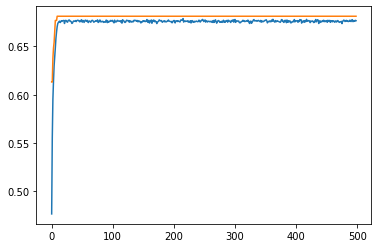

In [58]:
plt.plot(AVEdata)
plt.plot(MAXdata)
plt.show()